In [1]:
import xarray as xr
import matplotlib.pyplot as plt

import data_catalog
import tseries_mod
import esmlab_wrap

In [2]:
data_catalog.set_catalog('experiments')
varnames = ['FG_CO2', 'DIC_RIV_FLUX', 'DOC_RIV_FLUX', 'DOCr_RIV_FLUX', 'ALK_RIV_FLUX', 'pocToSed', 'calcToSed',
            'FvPER_DIC', 'FvICE_DIC', 'FvPER_ALK', 'FvICE_ALK']
drop_varnames = ['DIC_RIV_FLUX', 'DOC_RIV_FLUX', 'DOCr_RIV_FLUX', 'pocToSed', 'calcToSed',
                 'FvPER_DIC', 'FvICE_DIC', 'FvPER_ALK', 'FvICE_ALK']
regions = ['Global', 'SouOce (90S-30S)']

active catalog: experiments


In [3]:
def ocean_carbon_balance_summary(experiment):
    ds = tseries_mod.tseries_get_vars(varnames, 'ocn', experiment)

    ds['Ctot_RIV_FLUX'] = ds.DIC_RIV_FLUX + ds.DOC_RIV_FLUX + ds.DOCr_RIV_FLUX
    ds.Ctot_RIV_FLUX.attrs['units'] = ds.DIC_RIV_FLUX.attrs['units']
    ds.Ctot_RIV_FLUX.name = 'Ctot_RIV_FLUX'

    ds['CtotToSed'] = ds.pocToSed + ds.calcToSed
    ds.CtotToSed.attrs['units'] = ds.pocToSed.attrs['units']
    ds.CtotToSed.name = 'CtotToSed'

    ds['AlkToSed'] = 2*ds.calcToSed
    ds.AlkToSed.attrs['units'] = ds.calcToSed.attrs['units']
    ds.AlkToSed.name = 'AlkToSed'

    ds['FvTOT_DIC'] = ds.FvPER_DIC + ds.FvICE_DIC
    ds.FvTOT_DIC.attrs['units'] = ds.FvPER_DIC.attrs['units']
    ds.FvTOT_DIC.name = 'FvTOT_DIC'

    ds['FvTOT_ALK'] = ds.FvPER_ALK + ds.FvICE_ALK
    ds.FvTOT_ALK.attrs['units'] = ds.FvPER_ALK.attrs['units']
    ds.FvTOT_ALK.name = 'FvTOT_ALK'

    ds_ann = esmlab_wrap.compute_ann_mean(ds.load().drop(drop_varnames))

    for region in regions:
        print(ds_ann.mean('time').sel(region=region))
        title = ' '.join([experiment, region])
        tseries_mod.tseries_plot_1ds(ds_ann, ['FG_CO2'], title=title, region_val=region)
        tseries_mod.tseries_plot_1ds(ds_ann, ['Ctot_RIV_FLUX', 'CtotToSed'], title=title, region_val=region)
        tseries_mod.tseries_plot_1ds(ds_ann, ['ALK_RIV_FLUX', 'AlkToSed'], title=title, region_val=region)
        tseries_mod.tseries_plot_1ds(ds_ann, ['FvTOT_DIC'], title=title, region_val=region)

<xarray.Dataset>
Dimensions:        ()
Coordinates:
    region         <U6 'Global'
Data variables:
    FG_CO2         float64 -0.04243
    ALK_RIV_FLUX   float64 0.2568
    Ctot_RIV_FLUX  float64 0.4381
    CtotToSed      float64 0.4408
    AlkToSed       float64 0.2779
    FvTOT_DIC      float64 -0.0004452
    FvTOT_ALK      float64 -0.0005095
Attributes:
    history:  \n2019-11-11 17:54:58.243520 esmlab.resample(<DATASET>, freq="a...
<xarray.Dataset>
Dimensions:        ()
Coordinates:
    region         <U16 'SouOce (90S-30S)'
Data variables:
    FG_CO2         float64 0.2243
    ALK_RIV_FLUX   float64 0.009493
    Ctot_RIV_FLUX  float64 0.01773
    CtotToSed      float64 0.09299
    AlkToSed       float64 0.06235
    FvTOT_DIC      float64 -0.6666
    FvTOT_ALK      float64 -0.7545
Attributes:
    history:  \n2019-11-11 17:54:58.243520 esmlab.resample(<DATASET>, freq="a...


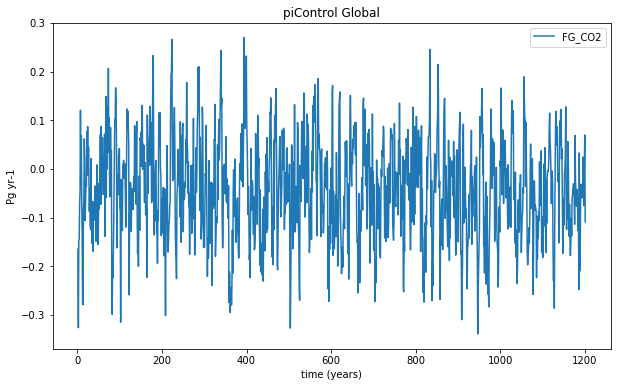

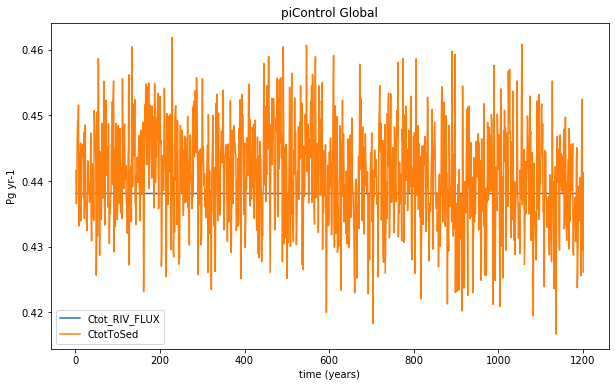

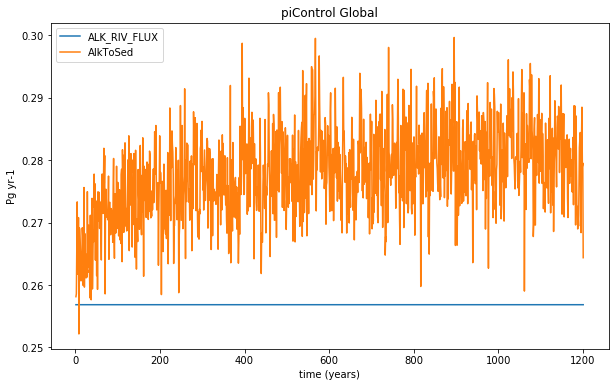

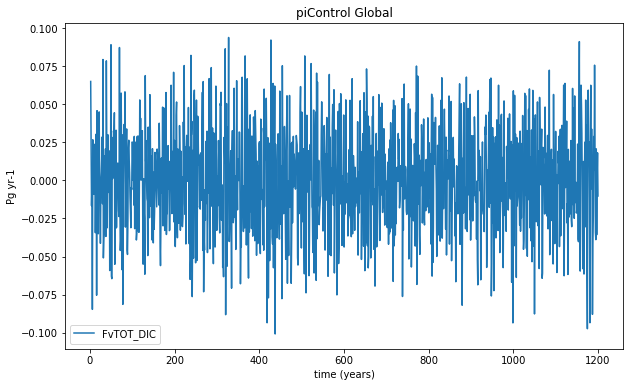

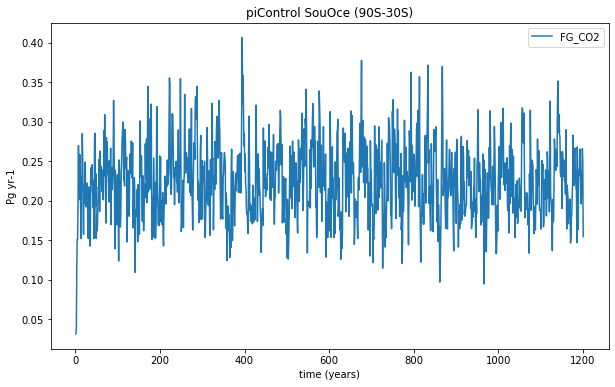

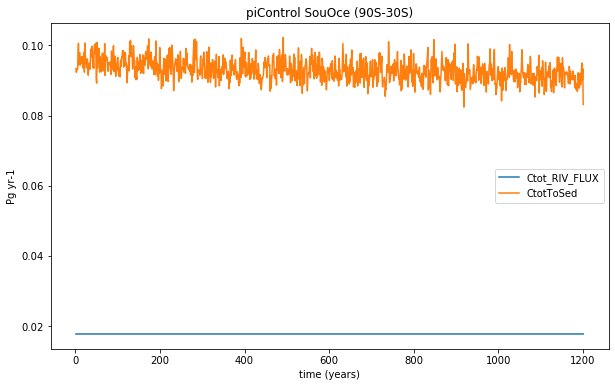

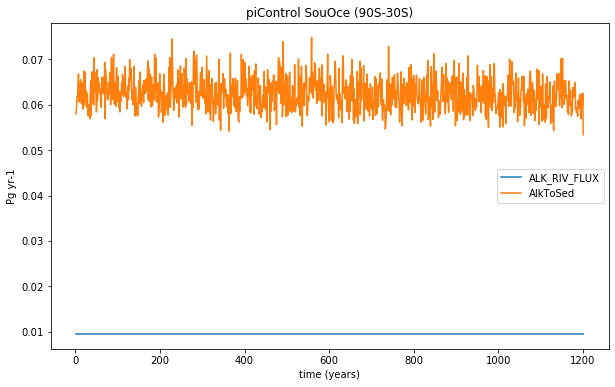

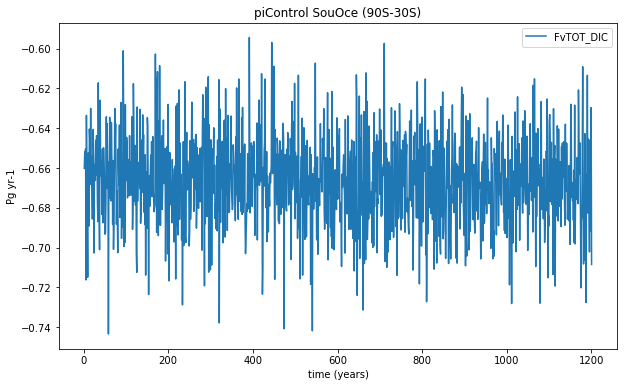

In [4]:
ocean_carbon_balance_summary(experiment='piControl')

<xarray.Dataset>
Dimensions:        ()
Coordinates:
    region         <U6 'Global'
Data variables:
    FG_CO2         float64 -0.06089
    ALK_RIV_FLUX   float64 0.2568
    Ctot_RIV_FLUX  float64 0.4381
    CtotToSed      float64 0.4393
    AlkToSed       float64 0.2718
    FvTOT_DIC      float64 -0.0002149
    FvTOT_ALK      float64 -0.0002459
Attributes:
    history:  \n2019-11-11 17:55:34.415200 esmlab.resample(<DATASET>, freq="a...
<xarray.Dataset>
Dimensions:        ()
Coordinates:
    region         <U16 'SouOce (90S-30S)'
Data variables:
    FG_CO2         float64 0.2144
    ALK_RIV_FLUX   float64 0.009493
    Ctot_RIV_FLUX  float64 0.01773
    CtotToSed      float64 0.09342
    AlkToSed       float64 0.0622
    FvTOT_DIC      float64 -0.6615
    FvTOT_ALK      float64 -0.7486
Attributes:
    history:  \n2019-11-11 17:55:34.415200 esmlab.resample(<DATASET>, freq="a...


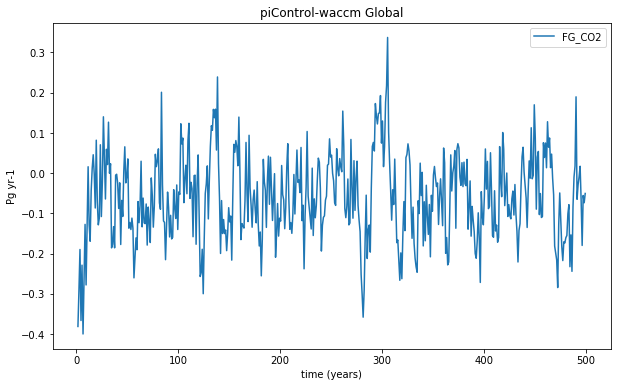

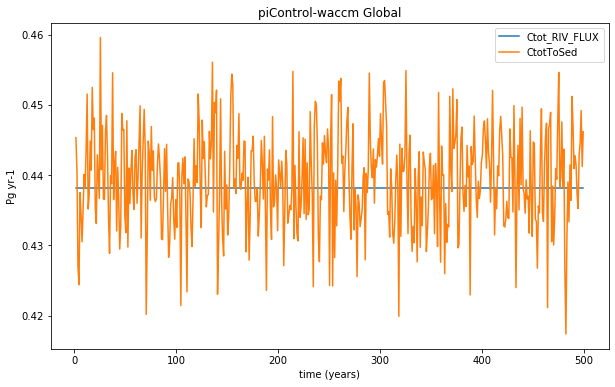

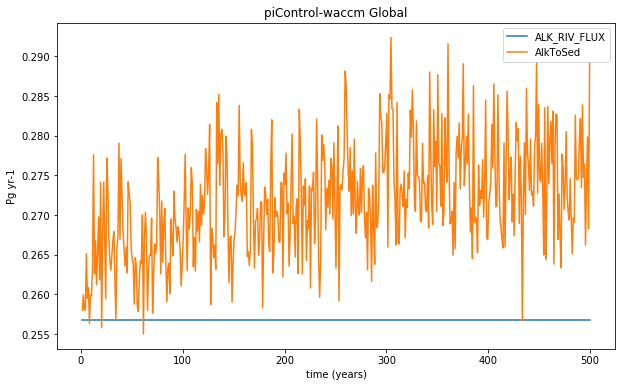

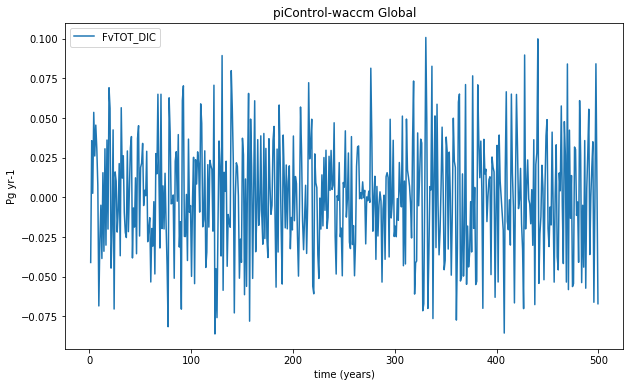

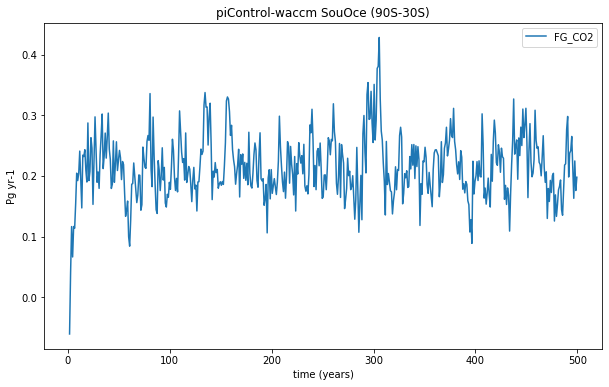

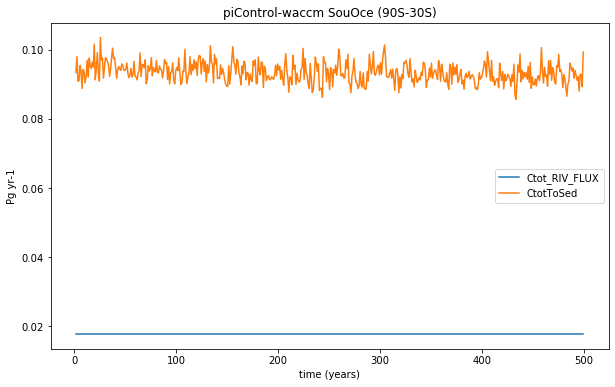

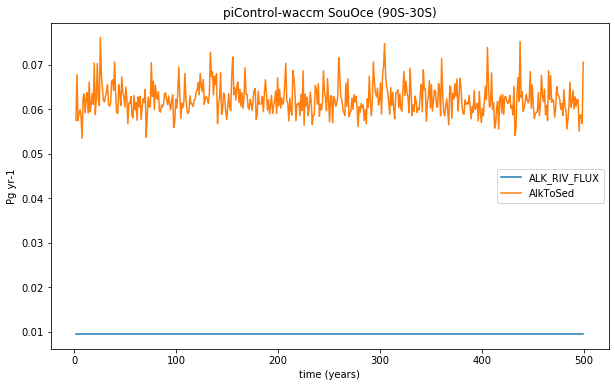

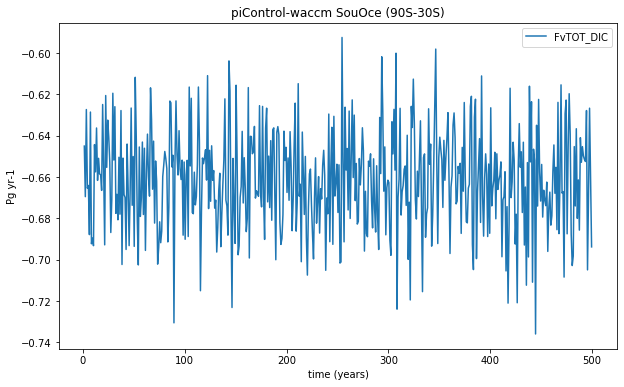

In [5]:
ocean_carbon_balance_summary(experiment='piControl-waccm')

<xarray.Dataset>
Dimensions:        ()
Coordinates:
    region         <U6 'Global'
Data variables:
    FG_CO2         float64 -0.01337
    ALK_RIV_FLUX   float64 0.2568
    Ctot_RIV_FLUX  float64 0.4381
    CtotToSed      float64 0.4395
    AlkToSed       float64 0.2798
    FvTOT_DIC      float64 -0.0004749
    FvTOT_ALK      float64 -0.0005435
Attributes:
    history:  \n2019-11-11 17:56:13.436537 esmlab.resample(<DATASET>, freq="a...
<xarray.Dataset>
Dimensions:        ()
Coordinates:
    region         <U16 'SouOce (90S-30S)'
Data variables:
    FG_CO2         float64 0.2352
    ALK_RIV_FLUX   float64 0.009493
    Ctot_RIV_FLUX  float64 0.01773
    CtotToSed      float64 0.09194
    AlkToSed       float64 0.06191
    FvTOT_DIC      float64 -0.6661
    FvTOT_ALK      float64 -0.7544
Attributes:
    history:  \n2019-11-11 17:56:13.436537 esmlab.resample(<DATASET>, freq="a...


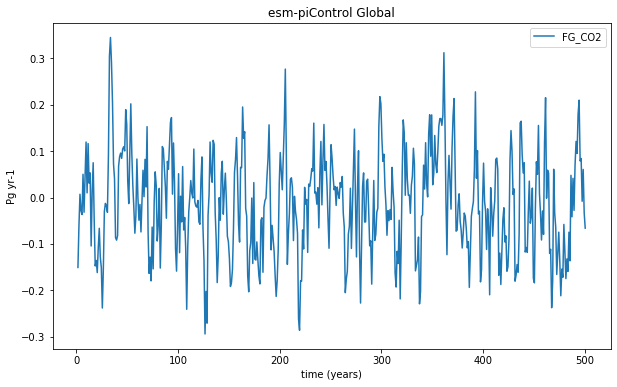

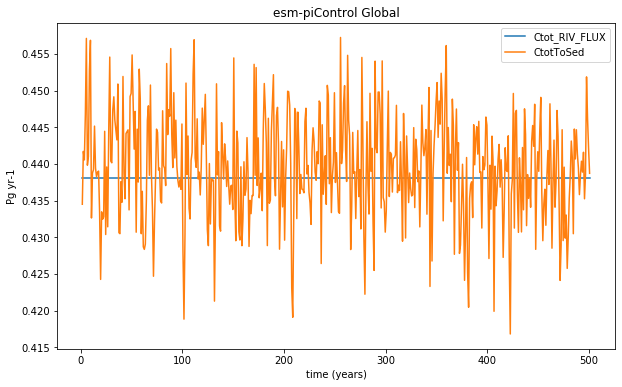

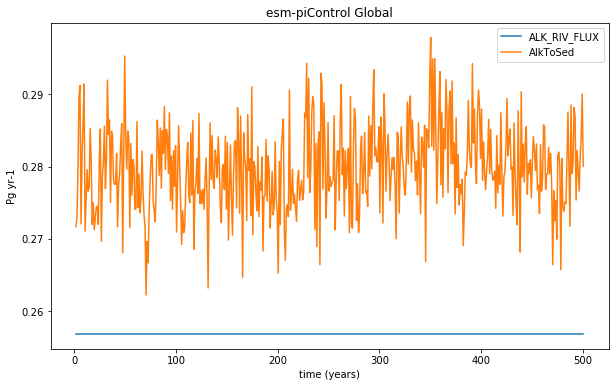

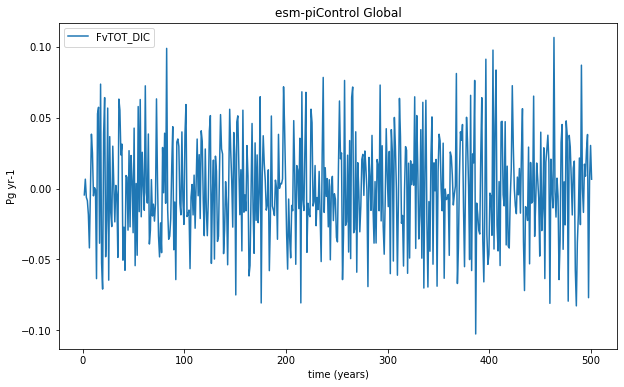

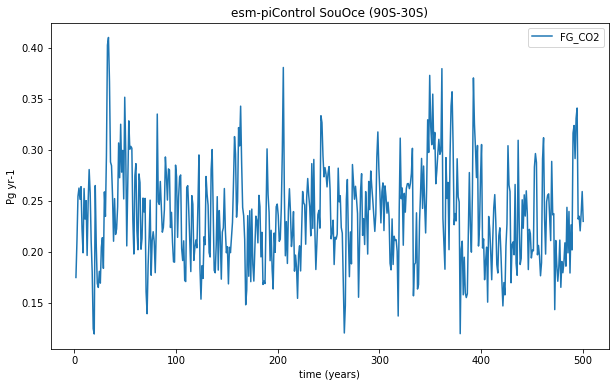

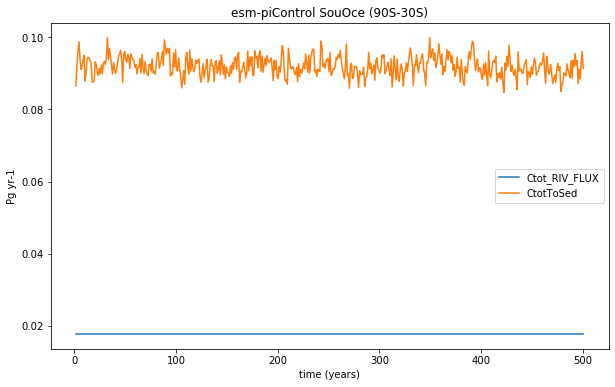

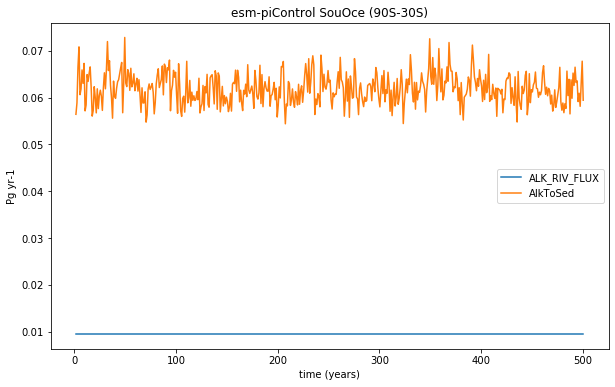

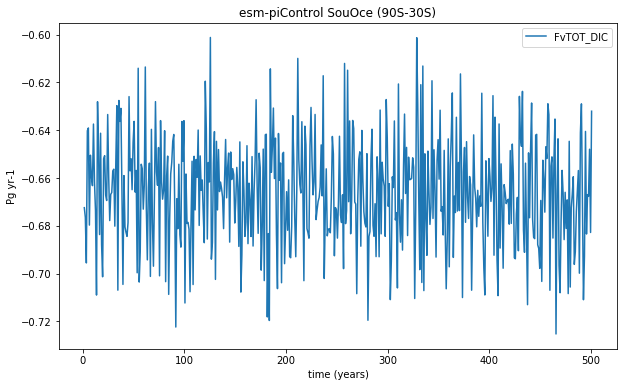

In [6]:
ocean_carbon_balance_summary(experiment='esm-piControl')

<xarray.Dataset>
Dimensions:        ()
Coordinates:
    region         <U6 'Global'
Data variables:
    FG_CO2         float64 -0.07444
    ALK_RIV_FLUX   float64 0.2568
    Ctot_RIV_FLUX  float64 0.4381
    CtotToSed      float64 0.4167
    AlkToSed       float64 0.2717
    FvTOT_DIC      float64 -0.0004223
    FvTOT_ALK      float64 -0.0004834
Attributes:
    history:  \n2019-11-11 17:56:50.408046 esmlab.resample(<DATASET>, freq="a...
<xarray.Dataset>
Dimensions:        ()
Coordinates:
    region         <U16 'SouOce (90S-30S)'
Data variables:
    FG_CO2         float64 0.133
    ALK_RIV_FLUX   float64 0.009493
    Ctot_RIV_FLUX  float64 0.01773
    CtotToSed      float64 0.08704
    AlkToSed       float64 0.05979
    FvTOT_DIC      float64 -0.5959
    FvTOT_ALK      float64 -0.6746
Attributes:
    history:  \n2019-11-11 17:56:50.408046 esmlab.resample(<DATASET>, freq="a...


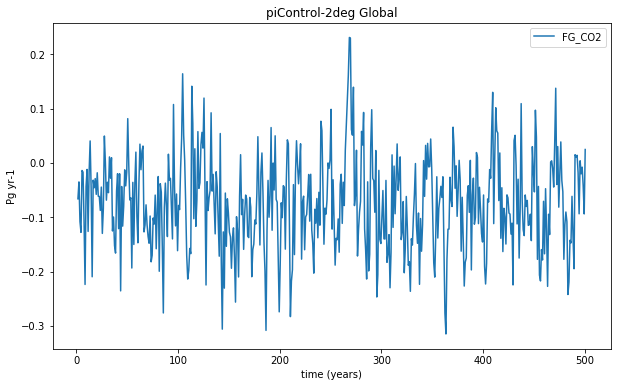

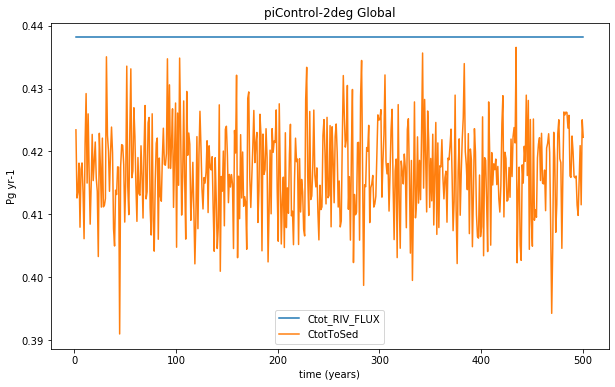

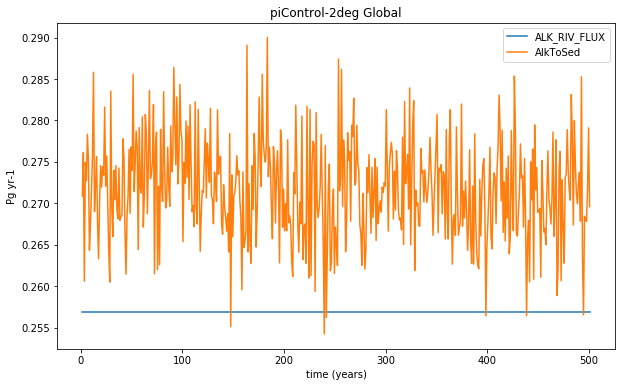

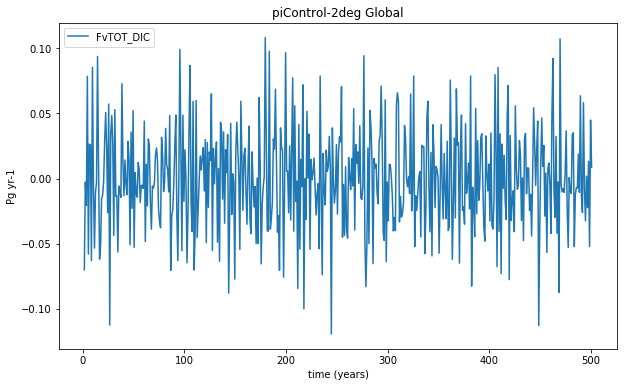

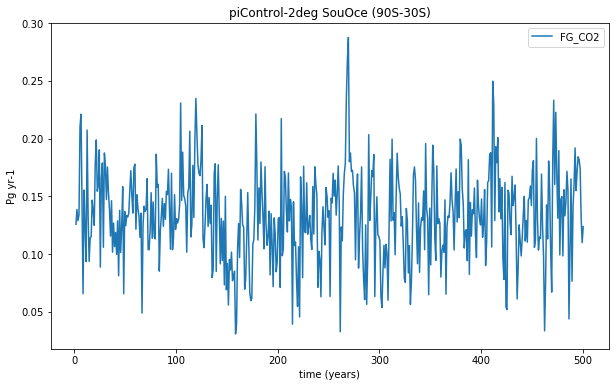

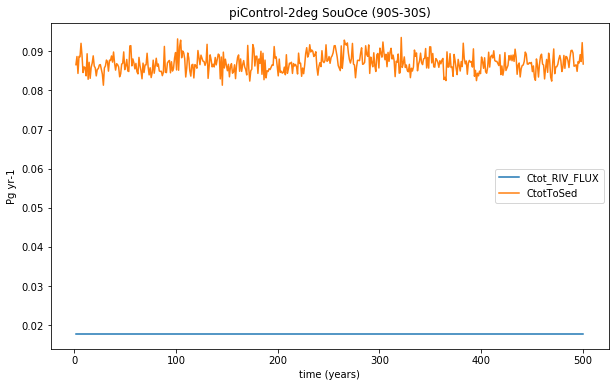

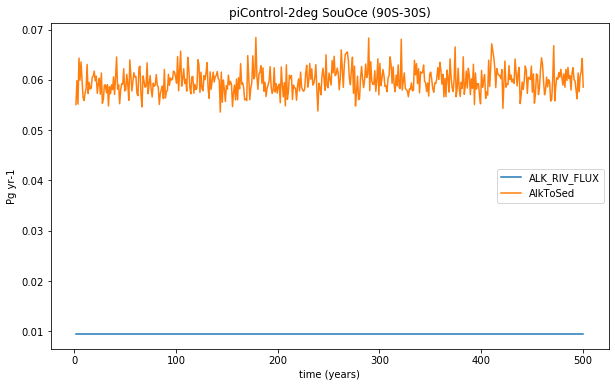

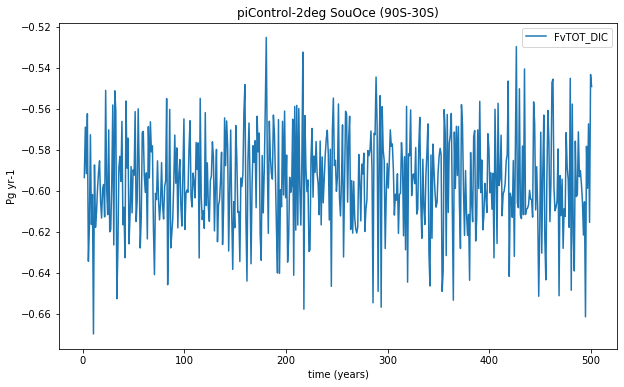

In [7]:
ocean_carbon_balance_summary(experiment='piControl-2deg')